# Part 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
x_data = np.linspace(0.0,10.0,1000000)

In [3]:
noise = np.random.randn(len(x_data))

In [4]:
x_data

array([0.000000e+00, 1.000001e-05, 2.000002e-05, ..., 9.999980e+00,
       9.999990e+00, 1.000000e+01])

In [5]:
# y = mx + b    bias = 5

y_true = (0.5 * x_data ) + 5 + noise

In [6]:
x_df = pd.DataFrame(data = x_data, columns=['X_Data'])

In [7]:
y_df = pd.DataFrame(data=y_true, columns=['Y'])

In [8]:
# x_data.head()

In [9]:
y_df.head()

,Y
0,4.818432
1,5.271916
2,4.332678
3,4.842039
4,5.956638


In [10]:
# x_df = pd.DataFrame(data = x_data, columns = ['X_Data'])

In [11]:
# y_df = pd.DataFrame(data=y_true, columns=['y'])

In [12]:
my_data = pd.concat([x_df,y_df],axis=1)

In [13]:
my_data.head()

,X_Data,Y
0,0.00000,4.818432
1,0.00001,5.271916
2,0.00002,4.332678
3,0.00003,4.842039
4,0.00004,5.956638


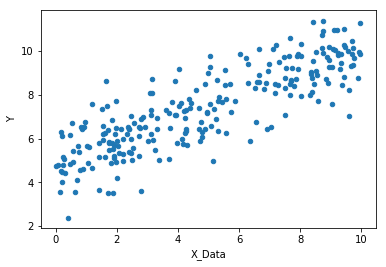

In [14]:
my_data.sample(n=250).plot(kind= 'scatter', x='X_Data', y='Y')

# Part 2

In [15]:
batch_size = 8

In [16]:
m = tf.Variable(0.5)
b = tf.Variable(1.0)

In [17]:
xph = tf.placeholder(tf.float32, [batch_size])
yph = tf.placeholder(tf.float32, [batch_size])

In [18]:
#model
y_model = m*xph + b

In [19]:
# cost function
error = tf.reduce_sum(tf.square(yph-y_model))

In [20]:
#optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [21]:
init = tf.global_variables_initializer()

In [22]:
with tf.Session() as sess:
    sess.run(init)
    
    batches = 10000
    
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        feed = {xph:x_data[rand_ind], yph:y_true[rand_ind]}
        sess.run(train,feed_dict = feed)
    model_m, model_b = sess.run([m,b])

In [23]:
model_m

0.51831776

In [24]:
model_b

5.02335

In [25]:
y_hat = x_data * model_m + model_b

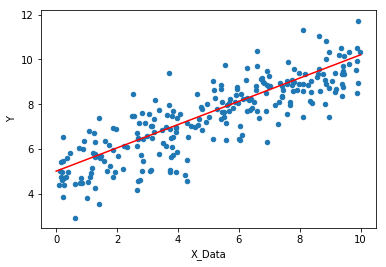

In [26]:
my_data.sample(n=250).plot(kind='scatter', x='X_Data', y='Y')
plt.plot(x_data,y_hat,'r')

# Part 3

In [27]:
#Estimator API
feat_cols = [tf.feature_column.numeric_column('x', shape=[1])]

In [28]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

W0716 12:43:41.638535 140510424102720 estimator.py:1811] Using temporary folder as model directory: /tmp/tmpefp5n1i9


In [29]:
#train test split
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data, y_true, test_size=0.3, random_state=0) 

In [31]:
x_eval.shape

(300000,)

In [32]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train, batch_size=4, num_epochs=None, shuffle=True)

In [33]:
train_input_func= tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train, batch_size=4, num_epochs=1000, shuffle=False)

In [34]:
eval_input_func =tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train, batch_size=4, num_epochs=1000, shuffle=False)

In [35]:
estimator.train(input_fn=input_func, steps=1000)

W0716 12:43:44.921673 140510424102720 deprecation.py:323] From /home/manish/anaconda3/lib/python3.7/site-packages/tensorflow/python/training/training_util.py:236: Variable.initialized_value (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
W0716 12:43:44.958659 140510424102720 deprecation.py:323] From /home/manish/anaconda3/lib/python3.7/site-packages/tensorflow_estimator/python/estimator/inputs/queues/feeding_queue_runner.py:62: QueueRunner.__init__ (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
W0716 12:43:44.966800 140510424102720 deprecation.py:323] From /home/manish/anaconda3/lib/python3.7/site-packages/tensorflow_estimator/python/estimator/inputs/q

# Part 4

In [36]:
train_matrics = estimator.evaluate(input_fn=train_input_func, steps=1000)

W0716 12:43:47.859578 140510424102720 deprecation.py:323] From /home/manish/anaconda3/lib/python3.7/site-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


In [37]:
eval_matrics = estimator.evaluate(input_fn=eval_input_func, steps=1000)

In [38]:
print(eval_matrics)

{'average_loss': 1.0870574, 'label/mean': 7.541786, 'loss': 4.3482294, 'prediction/mean': 7.415392, 'global_step': 1000}


In [39]:
print(train_matrics)

{'average_loss': 1.0870574, 'label/mean': 7.541786, 'loss': 4.3482294, 'prediction/mean': 7.415392, 'global_step': 1000}


In [40]:
input_fu_predict = tf.estimator.inputs.numpy_input_fn({'x':np.linspace(0,10,10)}, shuffle=False)

In [41]:
list(estimator.predict(input_fn=input_fu_predict))

[{'predictions': array([4.4286127], dtype=float32)},
 {'predictions': array([5.086904], dtype=float32)},
 {'predictions': array([5.7451954], dtype=float32)},
 {'predictions': array([6.4034867], dtype=float32)},
 {'predictions': array([7.061778], dtype=float32)},
 {'predictions': array([7.7200694], dtype=float32)},
 {'predictions': array([8.378361], dtype=float32)},
 {'predictions': array([9.036652], dtype=float32)},
 {'predictions': array([9.694944], dtype=float32)},
 {'predictions': array([10.353235], dtype=float32)}]

In [42]:
predictions = []
for x in estimator.predict(input_fn=input_fu_predict):
    predictions.append(x['predictions'])
    

In [43]:
predictions

[array([4.4286127], dtype=float32),
 array([5.086904], dtype=float32),
 array([5.7451954], dtype=float32),
 array([6.4034867], dtype=float32),
 array([7.061778], dtype=float32),
 array([7.7200694], dtype=float32),
 array([8.378361], dtype=float32),
 array([9.036652], dtype=float32),
 array([9.694944], dtype=float32),
 array([10.353235], dtype=float32)]

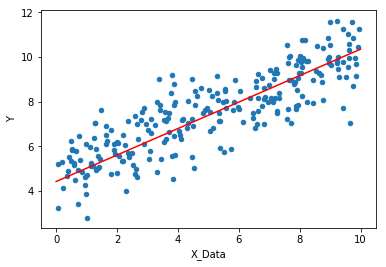

In [44]:
my_data.sample(n=250).plot(kind='scatter', x="X_Data", y="Y")
plt.plot(np.linspace(0,10,10),predictions, 'r')